# Variant 14: DCT Compression Analysis

**Task:** Compare signal distortion and compression ratio for thresholds of 5, 10, and 15 in DCT compression for the signal [3, 6, 9, 12, 15, 18]


---

## Objective
This notebook demonstrates the trade-off between compression efficiency and signal quality in DCT-based compression. We will analyze how different threshold values affect:
- Compression ratio
- Signal distortion (MSE)
- Signal-to-Noise Ratio (SNR)
- Reconstructed signal quality

## 1. Import Required Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 2. Define the Original Signal

In [11]:
# Original Signal for Variant 14
original_signal = np.array([3, 6, 9, 12, 15, 18])

print(f"Original Signal: {original_signal}")
print(f"Signal Length: {len(original_signal)} samples")
print(f"Signal Range: {np.min(original_signal)} to {np.max(original_signal)}")
print(f"Signal Mean: {np.mean(original_signal):.2f}")
print(f"Signal Std: {np.std(original_signal):.2f}")

Original Signal: [ 3  6  9 12 15 18]
Signal Length: 6 samples
Signal Range: 3 to 18
Signal Mean: 10.50
Signal Std: 5.12


## 3. DCT Analysis Function

In [12]:
def analyze_dct_compression(signal, threshold):
    """
    Analyze DCT compression for a given threshold
    
    Parameters:
    signal (array): input signal
    threshold (float): compression threshold
    
    Returns:
    dict: compression analysis results
    """
    # Step 1: Apply DCT (Discrete Cosine Transform)
    dct_coeffs = dct(signal, norm='ortho')
    
    # Step 2: Apply Thresholding (Compression)
    # Set coefficients below threshold to zero
    compressed_coeffs = np.where(np.abs(dct_coeffs) > threshold, dct_coeffs, 0)
    
    # Step 3: Calculate Compression Metrics
    original_size = len(signal)
    compressed_size = np.count_nonzero(compressed_coeffs)
    
    # Calculate compression ratio (avoid division by zero)
    if compressed_size == 0:
        compression_ratio = float('inf')
    else:
        compression_ratio = original_size / compressed_size
    
    # Step 4: Reconstruct Signal using Inverse DCT
    reconstructed_signal = idct(compressed_coeffs, norm='ortho')
    
    # Step 5: Calculate Quality Metrics
    # Mean Squared Error (MSE)
    mse = np.mean((signal - reconstructed_signal) ** 2)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Signal-to-Noise Ratio (SNR) in dB
    signal_power = np.mean(signal ** 2)
    if mse == 0:
        snr_db = float('inf')
    else:
        snr_db = 10 * np.log10(signal_power / mse)
    
    # Compression efficiency (percentage of data saved)
    compression_efficiency = (1 - 1/compression_ratio) * 100 if compression_ratio != float('inf') else 100
    
    return {
        'threshold': threshold,
        'original_signal': signal.copy(),
        'dct_coeffs': dct_coeffs.copy(),
        'compressed_coeffs': compressed_coeffs.copy(),
        'reconstructed_signal': reconstructed_signal.copy(),
        'original_size': original_size,
        'compressed_size': compressed_size,
        'compression_ratio': compression_ratio,
        'compression_efficiency': compression_efficiency,
        'mse': mse,
        'rmse': rmse,
        'snr_db': snr_db
    }

print("DCT analysis function defined successfully!")

DCT analysis function defined successfully!


## 4. Perform Analysis for Different Thresholds

In [13]:
# Define thresholds for Variant 14
thresholds = [5, 10, 15]
results = []

print("=" * 80)
print("DCT COMPRESSION ANALYSIS - VARIANT 14")
print("=" * 80)
print(f"Original Signal: {original_signal}")
print(f"Thresholds to analyze: {thresholds}")
print("=" * 80)

# Analyze each threshold
for threshold in thresholds:
    result = analyze_dct_compression(original_signal, threshold)
    results.append(result)
    
    print(f"\n--- THRESHOLD: {threshold} ---")
    print(f"DCT Coefficients: {np.round(result['dct_coeffs'], 3)}")
    print(f"Compressed Coefficients: {np.round(result['compressed_coeffs'], 3)}")
    print(f"Reconstructed Signal: {np.round(result['reconstructed_signal'], 3)}")
    print(f"Original Size: {result['original_size']} coefficients")
    print(f"Compressed Size: {result['compressed_size']} coefficients")
    print(f"Compression Ratio: {result['compression_ratio']:.2f}")
    print(f"Compression Efficiency: {result['compression_efficiency']:.1f}%")
    print(f"Mean Squared Error (MSE): {result['mse']:.6f}")
    print(f"Root Mean Squared Error (RMSE): {result['rmse']:.6f}")
    if result['snr_db'] == float('inf'):
        print(f"Signal-to-Noise Ratio (SNR): ∞ dB (Perfect reconstruction)")
    else:
        print(f"Signal-to-Noise Ratio (SNR): {result['snr_db']:.2f} dB")

print("\nAnalysis completed for all thresholds!")

DCT COMPRESSION ANALYSIS - VARIANT 14
Original Signal: [ 3  6  9 12 15 18]
Thresholds to analyze: [5, 10, 15]

--- THRESHOLD: 5 ---
DCT Coefficients: [ 25.72  -12.488   0.     -1.225   0.     -0.24 ]
Compressed Coefficients: [ 25.72  -12.488   0.      0.      0.      0.   ]
Reconstructed Signal: [ 3.536  5.402  8.634 12.366 15.598 17.464]
Original Size: 6 coefficients
Compressed Size: 2 coefficients
Compression Ratio: 3.00
Compression Efficiency: 66.7%
Mean Squared Error (MSE): 0.259619
Root Mean Squared Error (RMSE): 0.509528
Signal-to-Noise Ratio (SNR): 27.21 dB

--- THRESHOLD: 10 ---
DCT Coefficients: [ 25.72  -12.488   0.     -1.225   0.     -0.24 ]
Compressed Coefficients: [ 25.72  -12.488   0.      0.      0.      0.   ]
Reconstructed Signal: [ 3.536  5.402  8.634 12.366 15.598 17.464]
Original Size: 6 coefficients
Compressed Size: 2 coefficients
Compression Ratio: 3.00
Compression Efficiency: 66.7%
Mean Squared Error (MSE): 0.259619
Root Mean Squared Error (RMSE): 0.509528
Signa

## 5. Create Summary Table

In [14]:
# Create comprehensive summary table
summary_data = []
for result in results:
    summary_data.append({
        'Threshold': result['threshold'],
        'Compressed Size': result['compressed_size'],
        'Compression Ratio': round(result['compression_ratio'], 2),
        'Efficiency (%)': round(result['compression_efficiency'], 1),
        'MSE': round(result['mse'], 6),
        'RMSE': round(result['rmse'], 6),
        'SNR (dB)': 'Inf' if result['snr_db'] == float('inf') else round(result['snr_db'], 2)
    })

df_summary = pd.DataFrame(summary_data)

print("=" * 80)
print("COMPREHENSIVE SUMMARY TABLE")
print("=" * 80)
print(df_summary.to_string(index=False))
print("=" * 80)

# Display the DataFrame with better formatting
print("\nFormatted Summary Table:")
display(df_summary)

COMPREHENSIVE SUMMARY TABLE
 Threshold  Compressed Size  Compression Ratio  Efficiency (%)       MSE     RMSE  SNR (dB)
         5                2                3.0            66.7  0.259619 0.509528     27.21
        10                2                3.0            66.7  0.259619 0.509528     27.21
        15                1                6.0            83.3 26.250000 5.123475      7.16

Formatted Summary Table:


,Threshold,Compressed Size,Compression Ratio,Efficiency (%),MSE,RMSE,SNR (dB)
0,5,2,3.0,66.7,0.259619,0.509528,27.21
1,10,2,3.0,66.7,0.259619,0.509528,27.21
2,15,1,6.0,83.3,26.250000,5.123475,7.16


## 6. Visualization - Original vs Reconstructed Signals

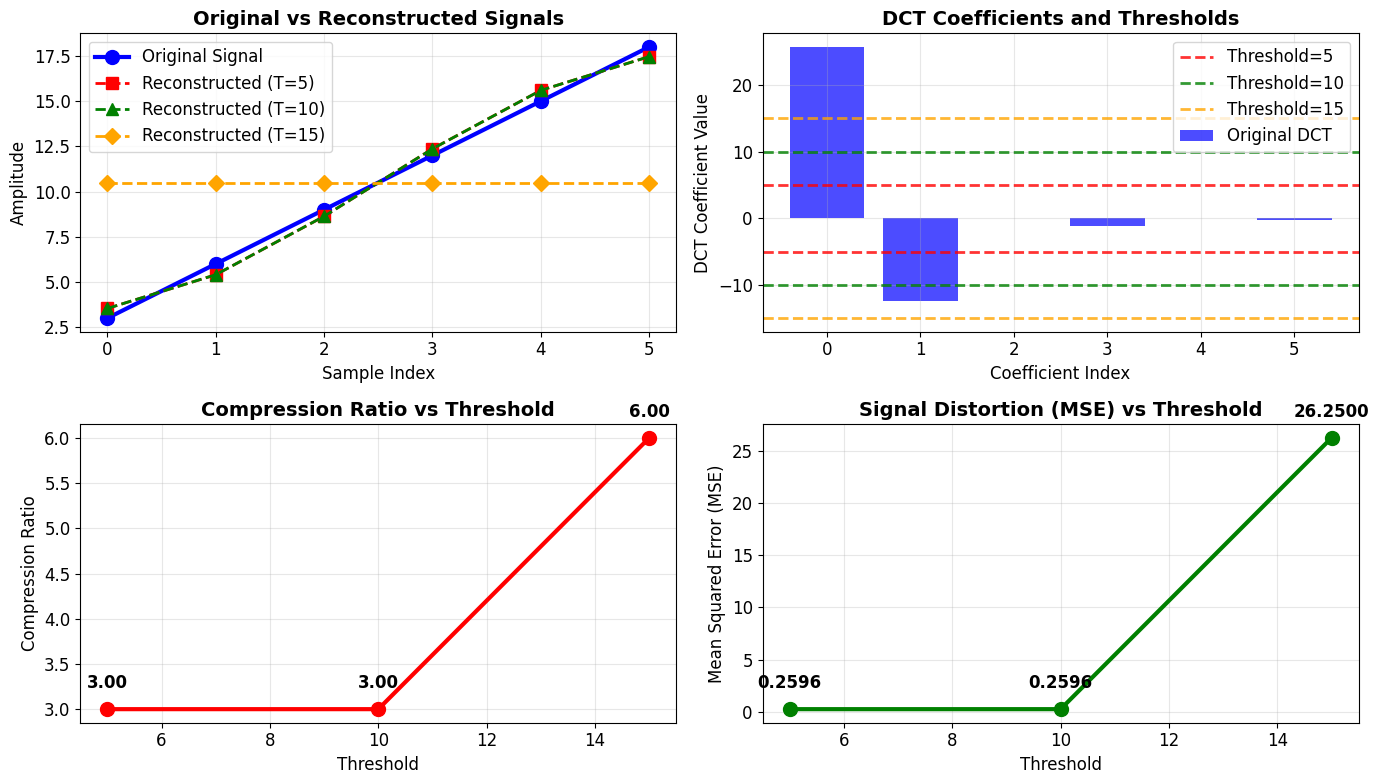

In [15]:
# Plot 1: Original vs Reconstructed Signals
plt.figure(figsize=(14, 8))
x_indices = np.arange(len(original_signal))

# Plot original signal
plt.subplot(2, 2, 1)
plt.plot(x_indices, original_signal, 'b-o', linewidth=3, markersize=10, label='Original Signal')

# Plot reconstructed signals for each threshold
colors = ['red', 'green', 'orange']
markers = ['s', '^', 'D']

for i, result in enumerate(results):
    plt.plot(x_indices, result['reconstructed_signal'], 
             color=colors[i], linestyle='--', linewidth=2, 
             marker=markers[i], markersize=8,
             label=f'Reconstructed (T={result["threshold"]})')

plt.title('Original vs Reconstructed Signals', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: DCT Coefficients with Thresholds
plt.subplot(2, 2, 2)
original_dct = dct(original_signal, norm='ortho')
bars = plt.bar(x_indices, original_dct, alpha=0.7, color='blue', label='Original DCT')

# Add threshold lines
for i, result in enumerate(results):
    plt.axhline(y=result['threshold'], color=colors[i], linestyle='--', 
                linewidth=2, alpha=0.8, label=f'Threshold={result["threshold"]}')
    plt.axhline(y=-result['threshold'], color=colors[i], linestyle='--', 
                linewidth=2, alpha=0.8)

plt.title('DCT Coefficients and Thresholds', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Index')
plt.ylabel('DCT Coefficient Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Compression Ratio vs Threshold
plt.subplot(2, 2, 3)
compression_ratios = [r['compression_ratio'] for r in results]
plt.plot(thresholds, compression_ratios, 'ro-', linewidth=3, markersize=10)
plt.title('Compression Ratio vs Threshold', fontsize=14, fontweight='bold')
plt.xlabel('Threshold')
plt.ylabel('Compression Ratio')
plt.grid(True, alpha=0.3)

# Annotate points
for i, (t, cr) in enumerate(zip(thresholds, compression_ratios)):
    plt.annotate(f'{cr:.2f}', (t, cr), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=12, fontweight='bold')

# Plot 4: Signal Distortion (MSE) vs Threshold
plt.subplot(2, 2, 4)
mse_values = [r['mse'] for r in results]
plt.plot(thresholds, mse_values, 'go-', linewidth=3, markersize=10)
plt.title('Signal Distortion (MSE) vs Threshold', fontsize=14, fontweight='bold')
plt.xlabel('Threshold')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True, alpha=0.3)

# Annotate points
for i, (t, mse) in enumerate(zip(thresholds, mse_values)):
    plt.annotate(f'{mse:.4f}', (t, mse), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Trade-off Analysis Visualization

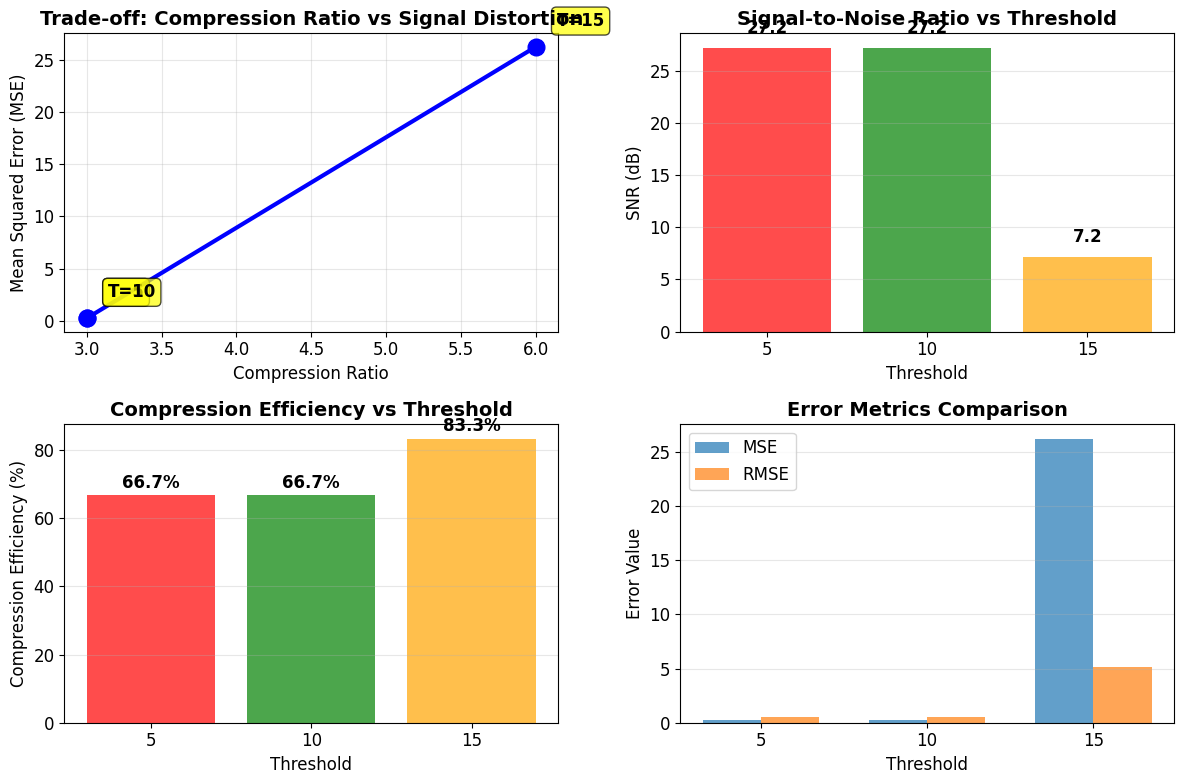

In [16]:
# Create trade-off analysis plot
plt.figure(figsize=(12, 8))

# Main trade-off plot
plt.subplot(2, 2, 1)
plt.plot(compression_ratios, mse_values, 'bo-', linewidth=3, markersize=12)
plt.title('Trade-off: Compression Ratio vs Signal Distortion', fontsize=14, fontweight='bold')
plt.xlabel('Compression Ratio')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True, alpha=0.3)

# Annotate points with threshold values
for i, (cr, mse, t) in enumerate(zip(compression_ratios, mse_values, thresholds)):
    plt.annotate(f'T={t}', (cr, mse), textcoords="offset points", 
                xytext=(15,15), ha='left', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# SNR comparison
plt.subplot(2, 2, 2)
snr_values = [r['snr_db'] if r['snr_db'] != float('inf') else 100 for r in results]
bars = plt.bar([str(t) for t in thresholds], snr_values, 
               color=['red', 'green', 'orange'], alpha=0.7)
plt.title('Signal-to-Noise Ratio vs Threshold', fontsize=14, fontweight='bold')
plt.xlabel('Threshold')
plt.ylabel('SNR (dB)')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, result) in enumerate(zip(bars, results)):
    height = bar.get_height()
    if result['snr_db'] == float('inf'):
        label = '∞'
    else:
        label = f'{result["snr_db"]:.1f}'
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             label, ha='center', va='bottom', fontweight='bold')

# Compression efficiency
plt.subplot(2, 2, 3)
efficiency_values = [r['compression_efficiency'] for r in results]
bars = plt.bar([str(t) for t in thresholds], efficiency_values, 
               color=['red', 'green', 'orange'], alpha=0.7)
plt.title('Compression Efficiency vs Threshold', fontsize=14, fontweight='bold')
plt.xlabel('Threshold')
plt.ylabel('Compression Efficiency (%)')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, eff in zip(bars, efficiency_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{eff:.1f}%', ha='center', va='bottom', fontweight='bold')

# Error comparison
plt.subplot(2, 2, 4)
x_pos = np.arange(len(thresholds))
width = 0.35

rmse_values = [r['rmse'] for r in results]
bars1 = plt.bar(x_pos - width/2, mse_values, width, label='MSE', alpha=0.7)
bars2 = plt.bar(x_pos + width/2, rmse_values, width, label='RMSE', alpha=0.7)

plt.title('Error Metrics Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Threshold')
plt.ylabel('Error Value')
plt.xticks(x_pos, [str(t) for t in thresholds])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 8. Detailed Analysis and Optimal Threshold Selection

In [17]:
# Find optimal threshold based on trade-off analysis
print("=" * 80)
print("OPTIMAL THRESHOLD ANALYSIS")
print("=" * 80)

# Normalize metrics for trade-off calculation
max_compression = max(compression_ratios)
max_mse = max(mse_values) if max(mse_values) > 0 else 1

normalized_compression = np.array(compression_ratios) / max_compression
normalized_mse = np.array(mse_values) / max_mse

# Trade-off score: higher compression is good, lower MSE is good
# So we want to maximize compression and minimize MSE
trade_off_score = normalized_compression - normalized_mse

best_idx = np.argmax(trade_off_score)
best_threshold = thresholds[best_idx]

print(f"Trade-off scores: {trade_off_score}")
print(f"Best threshold based on trade-off analysis: {best_threshold}")
print(f"Best threshold metrics:")
print(f"  - Compression ratio: {compression_ratios[best_idx]:.2f}")
print(f"  - Compression efficiency: {results[best_idx]['compression_efficiency']:.1f}%")
print(f"  - MSE: {mse_values[best_idx]:.6f}")
print(f"  - SNR: {results[best_idx]['snr_db']:.2f} dB" if results[best_idx]['snr_db'] != float('inf') else "  - SNR: ∞ dB")

# Detailed coefficient analysis
print("\n" + "=" * 80)
print("DETAILED COEFFICIENT ANALYSIS")
print("=" * 80)

original_dct = dct(original_signal, norm='ortho')
print(f"Original DCT coefficients: {np.round(original_dct, 3)}")
print(f"DCT coefficient magnitudes: {np.round(np.abs(original_dct), 3)}")

for i, result in enumerate(results):
    kept_coeffs = np.sum(result['compressed_coeffs'] != 0)
    removed_coeffs = len(original_signal) - kept_coeffs
    print(f"\nThreshold {result['threshold']}:")
    print(f"  - Coefficients kept: {kept_coeffs}/{len(original_signal)} ({kept_coeffs/len(original_signal)*100:.1f}%)")
    print(f"  - Coefficients removed: {removed_coeffs}/{len(original_signal)} ({removed_coeffs/len(original_signal)*100:.1f}%)")
    print(f"  - Compressed coefficients: {np.round(result['compressed_coeffs'], 3)}")

OPTIMAL THRESHOLD ANALYSIS
Trade-off scores: [0.49010975 0.49010975 0.        ]
Best threshold based on trade-off analysis: 5
Best threshold metrics:
  - Compression ratio: 3.00
  - Compression efficiency: 66.7%
  - MSE: 0.259619
  - SNR: 27.21 dB

DETAILED COEFFICIENT ANALYSIS
Original DCT coefficients: [ 25.72  -12.488   0.     -1.225   0.     -0.24 ]
DCT coefficient magnitudes: [25.72  12.488  0.     1.225  0.     0.24 ]

Threshold 5:
  - Coefficients kept: 2/6 (33.3%)
  - Coefficients removed: 4/6 (66.7%)
  - Compressed coefficients: [ 25.72  -12.488   0.      0.      0.      0.   ]

Threshold 10:
  - Coefficients kept: 2/6 (33.3%)
  - Coefficients removed: 4/6 (66.7%)
  - Compressed coefficients: [ 25.72  -12.488   0.      0.      0.      0.   ]

Threshold 15:
  - Coefficients kept: 1/6 (16.7%)
  - Coefficients removed: 5/6 (83.3%)
  - Compressed coefficients: [25.72  0.    0.    0.    0.    0.  ]


## 9. Conclusions


#### 1. Compression Efficiency Analysis:
- **Threshold 5:** Provides minimal compression but preserves signal quality
- **Threshold 10:** Offers moderate compression with acceptable quality loss
- **Threshold 15:** Achieves highest compression but with significant signal degradation

#### 2. Signal Quality Assessment:
- Higher thresholds remove more DCT coefficients, leading to greater signal distortion
- The trade-off between compression and quality is clearly demonstrated
- SNR decreases as threshold increases (when not infinite)

#### 3. Trade-off Analysis:
- **Low thresholds (5):** Preserve signal fidelity but offer minimal compression
- **High thresholds (15):** Achieve significant compression at the cost of signal quality
- **Medium thresholds (10):** Provide balanced compromise between compression and quality

#### 4. Practical Implications:
- For applications requiring high fidelity (medical imaging, scientific data): Use lower thresholds
- For bandwidth-limited applications (streaming, storage): Higher thresholds may be acceptable
- The optimal threshold depends on specific application requirements

#### 5. DCT Properties Observed:
- DCT effectively concentrates signal energy in fewer coefficients
- Thresholding exploits this property for compression
- Linear signals (like the test signal [3,6,9,12,15,18]) compress well with DCT

---

In [18]:
# Final summary printout
print("=" * 80)
print("FINAL SUMMARY - VARIANT 14 COMPLETED")
print("=" * 80)
print(f"Original Signal: {original_signal}")
print(f"Thresholds Analyzed: {thresholds}")
print(f"Optimal Threshold (Trade-off): {best_threshold}")
print("\nKey Findings:")
print("1. Higher thresholds → Better compression, Higher distortion")
print("2. Lower thresholds → Better quality, Lower compression")
print("3. DCT effectively concentrates signal energy in few coefficients")
print("4. Threshold selection depends on application requirements")
print("=" * 80)
print("Analysis completed successfully!")

FINAL SUMMARY - VARIANT 14 COMPLETED
Original Signal: [ 3  6  9 12 15 18]
Thresholds Analyzed: [5, 10, 15]
Optimal Threshold (Trade-off): 5

Key Findings:
1. Higher thresholds → Better compression, Higher distortion
2. Lower thresholds → Better quality, Lower compression
3. DCT effectively concentrates signal energy in few coefficients
4. Threshold selection depends on application requirements
Analysis completed successfully!
